### 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import eda_helper_functions

import seaborn as sns
from sklearn.ensemble import IsolationForest

### 2. Reading Training Data

In [3]:
file_path=r"C:\Users\shash\OneDrive\Desktop\prediction_project\data\train.csv"
train=pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-01,Banglore,Delhi,04:00:00,06:50:00,170,0.0,No Info,3943
1,Air India,2019-05-21,Mumbai,Hyderabad,15:00:00,16:25:00,85,0.0,No Info,3100
2,Indigo,2019-06-01,Chennai,Kolkata,14:45:00,17:05:00,140,0.0,No Info,3597
3,Jet Airways,2019-05-27,Delhi,Cochin,07:05:00,12:35:00,330,1.0,In-flight meal not included,12898
4,Jet Airways,2019-05-09,Kolkata,Banglore,08:25:00,16:20:00,475,1.0,No Info,13941
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-03,Mumbai,Hyderabad,19:35:00,21:05:00,90,0.0,No Info,5678
636,Spicejet,2019-04-09,Kolkata,Banglore,17:10:00,19:40:00,150,0.0,No Info,3873
637,Jet Airways,2019-06-27,Delhi,Cochin,05:30:00,12:35:00,425,2.0,In-flight meal not included,13344
638,Air Asia,2019-06-24,Delhi,Cochin,16:45:00,22:25:00,340,1.0,No Info,6752


In [4]:
# train.dtypes

In [5]:
train = train.assign(**{
    col:pd.to_datetime(train.loc[:,col],dayfirst=True, format="mixed")
    for col in ['date_of_journey','dep_time','arrival_time']
})


train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [6]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-01,Banglore,Delhi,2024-06-23 04:00:00,2024-06-23 06:50:00,170,0.0,No Info,3943
1,Air India,2019-05-21,Mumbai,Hyderabad,2024-06-23 15:00:00,2024-06-23 16:25:00,85,0.0,No Info,3100
2,Indigo,2019-06-01,Chennai,Kolkata,2024-06-23 14:45:00,2024-06-23 17:05:00,140,0.0,No Info,3597
3,Jet Airways,2019-05-27,Delhi,Cochin,2024-06-23 07:05:00,2024-06-23 12:35:00,330,1.0,In-flight meal not included,12898
4,Jet Airways,2019-05-09,Kolkata,Banglore,2024-06-23 08:25:00,2024-06-23 16:20:00,475,1.0,No Info,13941
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-03-03,Mumbai,Hyderabad,2024-06-23 19:35:00,2024-06-23 21:05:00,90,0.0,No Info,5678
636,Spicejet,2019-04-09,Kolkata,Banglore,2024-06-23 17:10:00,2024-06-23 19:40:00,150,0.0,No Info,3873
637,Jet Airways,2019-06-27,Delhi,Cochin,2024-06-23 05:30:00,2024-06-23 12:35:00,425,2.0,In-flight meal not included,13344
638,Air Asia,2019-06-24,Delhi,Cochin,2024-06-23 16:45:00,2024-06-23 22:25:00,340,1.0,No Info,6752


## 3.High-level summary of data

In [7]:
train.describe(include='number')

,duration,total_stops,price
count,640.00000,640.000000,640.000000
mean,587.15625,0.764062,8917.264063
std,483.98406,0.646858,4483.111371
min,80.00000,0.000000,1965.000000
25%,170.00000,0.000000,5188.250000
50%,447.50000,1.000000,8032.500000
75%,831.25000,1.000000,12378.500000
max,2295.00000,3.000000,36235.000000


In [8]:
train.describe(include="O")   ## We want to add total stops also as categorical feature

,airline,source,destination,additional_info
count,640,640,640,640
unique,8,5,6,4
top,Jet Airways,Delhi,Cochin,No Info
freq,202,248,248,516


In [9]:
(
    train
    .assign(total_stops=train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,4
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,202,248,248,340.0,516


## 4 High-Level Analysis of Missing Values

In [10]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


### 5. High-level analysis of Outliers

In [11]:
forest = IsolationForest(n_estimators=10,random_state=42)

In [12]:
(
    train
    .assign(outlier=forest.fit_predict(
        train
        .drop(columns='price')
        .select_dtypes(include="number")
    ))
    .query("outlier == -1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Air India,2019-05-21,Mumbai,Hyderabad,2024-06-23 15:00:00,2024-06-23 16:25:00,85,0.0,No Info,3100,-1
2,Indigo,2019-06-01,Chennai,Kolkata,2024-06-23 14:45:00,2024-06-23 17:05:00,140,0.0,No Info,3597,-1
7,Spicejet,2019-03-03,Kolkata,Banglore,2024-06-23 09:00:00,2024-06-23 11:30:00,150,0.0,No Info,5515,-1
8,Indigo,2019-03-06,Delhi,Cochin,2024-06-23 05:35:00,2024-06-23 08:50:00,195,0.0,No Info,7673,-1
11,Air India,2019-05-01,Delhi,Cochin,2024-06-23 17:15:00,2024-06-23 09:25:00,970,2.0,No Info,8839,-1
...,...,...,...,...,...,...,...,...,...,...,...
628,Jet Airways,2019-06-12,Kolkata,Banglore,2024-06-23 17:00:00,2024-06-23 18:00:00,1500,1.0,No Info,12692,-1
635,Jet Airways,2019-03-03,Mumbai,Hyderabad,2024-06-23 19:35:00,2024-06-23 21:05:00,90,0.0,No Info,5678,-1
636,Spicejet,2019-04-09,Kolkata,Banglore,2024-06-23 17:10:00,2024-06-23 19:40:00,150,0.0,No Info,3873,-1
637,Jet Airways,2019-06-27,Delhi,Cochin,2024-06-23 05:30:00,2024-06-23 12:35:00,425,2.0,In-flight meal not included,13344,-1


## 6. Pair Plots

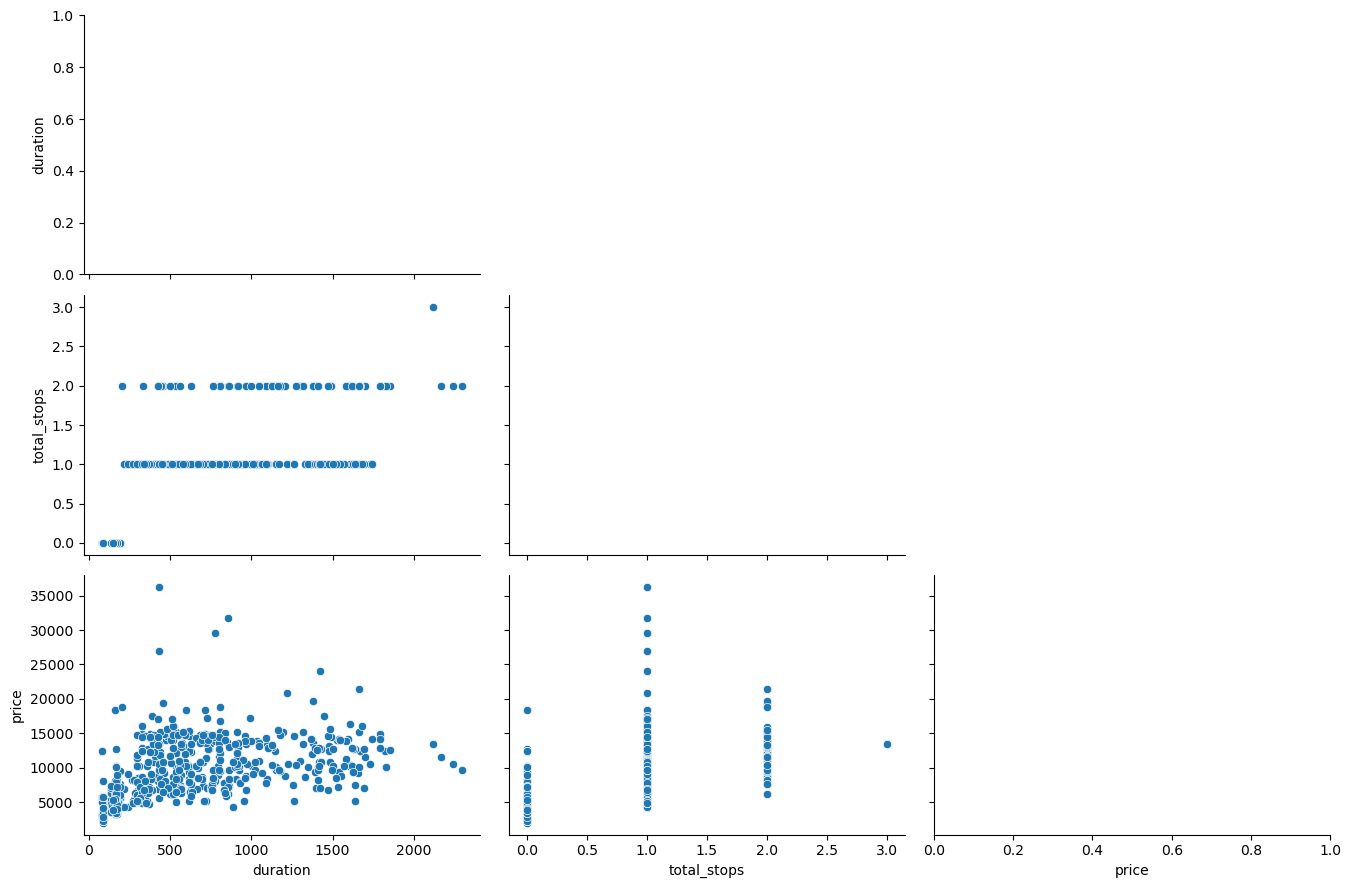

In [13]:
eda_helper_functions.pair_plots(train)

## 7. Multiple Collinearity

C:\Users\shash\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


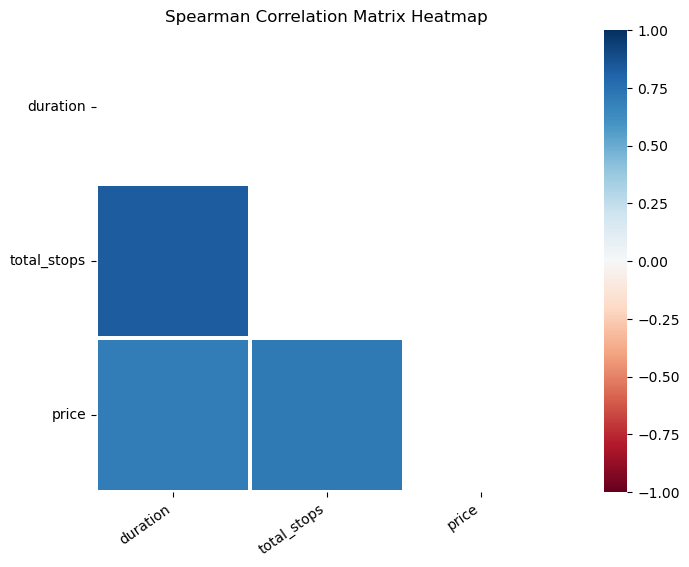

In [14]:
eda_helper_functions.correlation_heatmap(train)

C:\Users\shash\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


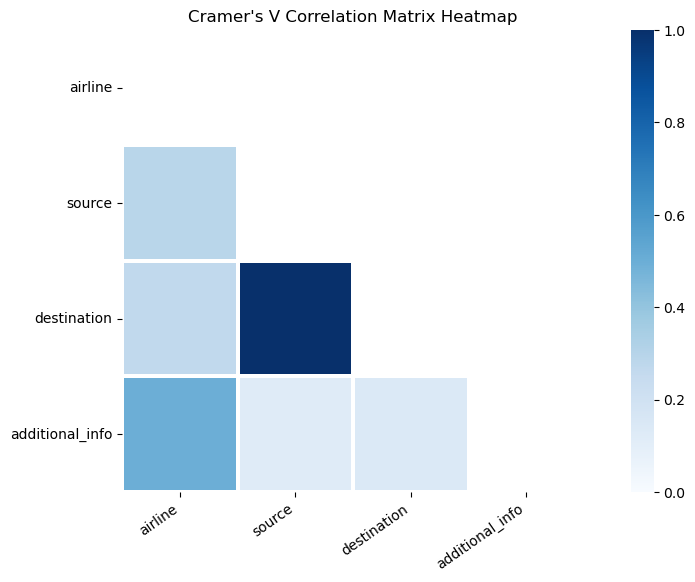

In [15]:
eda_helper_functions.cramersV_heatmap(train)

### 8. Deatiled analysis

In [16]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 Airline

In [49]:
train.airline

0           Indigo
1        Air India
2           Indigo
3      Jet Airways
4      Jet Airways
          ...     
635    Jet Airways
636       Spicejet
637    Jet Airways
638       Air Asia
639         Indigo
Name: airline, Length: 640, dtype: object

In [20]:
eda_helper_functions.cat_summary(train,'airline')

0           Indigo
1        Air India
2           Indigo
3      Jet Airways
4      Jet Airways
          ...     
635    Jet Airways
636       Spicejet
637    Jet Airways
638       Air Asia
639         Indigo
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,202


,count,percentage
category,,
Jet Airways,202,0.315625
Indigo,135,0.210938
Air India,111,0.173437
Multiple Carriers,77,0.120313
Spicejet,52,0.081250
Air Asia,27,0.042188
Vistara,24,0.037500
Goair,12,0.018750


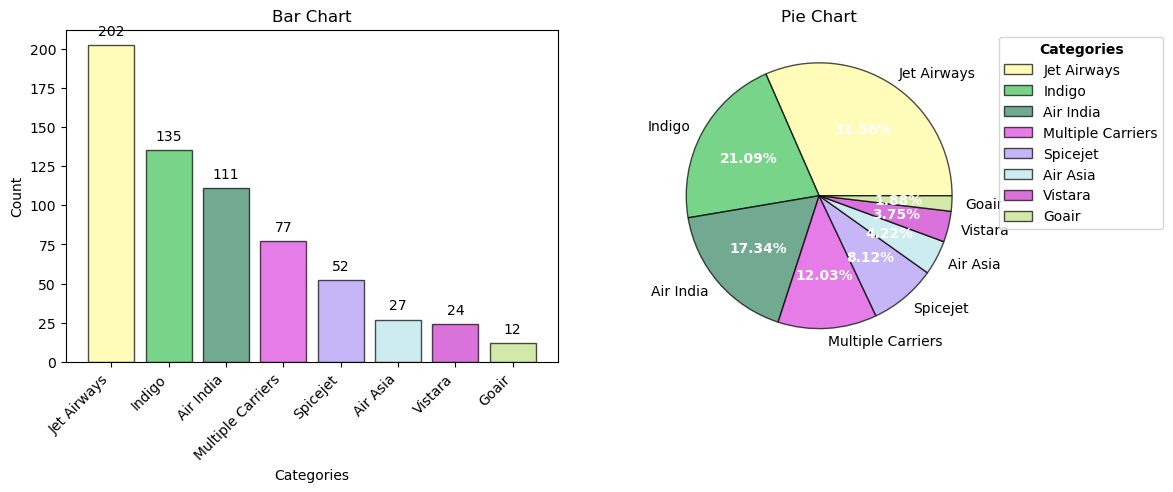

In [51]:
eda_helper_functions.cat_univar_plots(train,'airline',show_wordcloud=False)

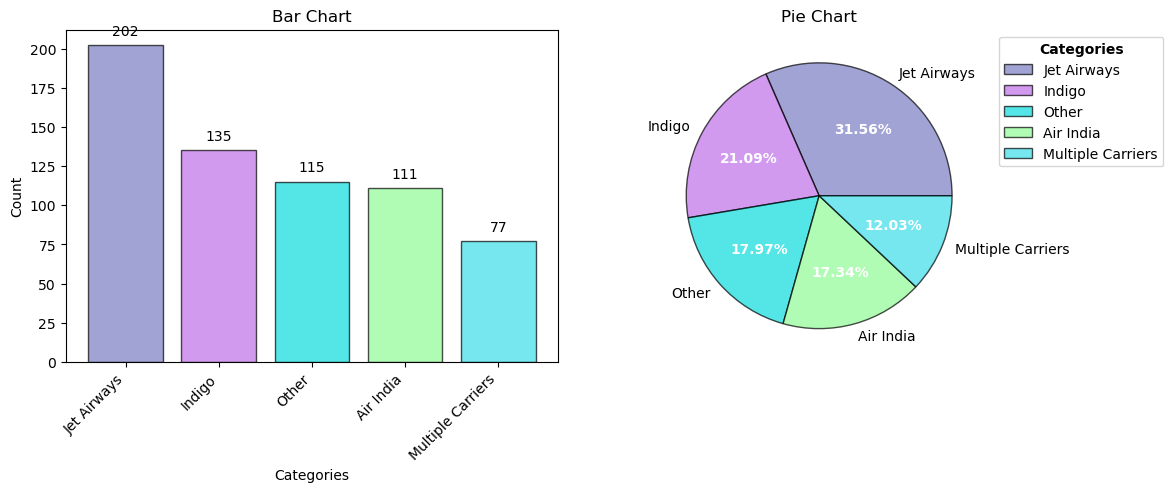

In [54]:
eda_helper_functions.cat_univar_plots(train,'airline',show_wordcloud=False,k=4)  

# Shows graph of top 4 categories and make rest in s single one named 'other'

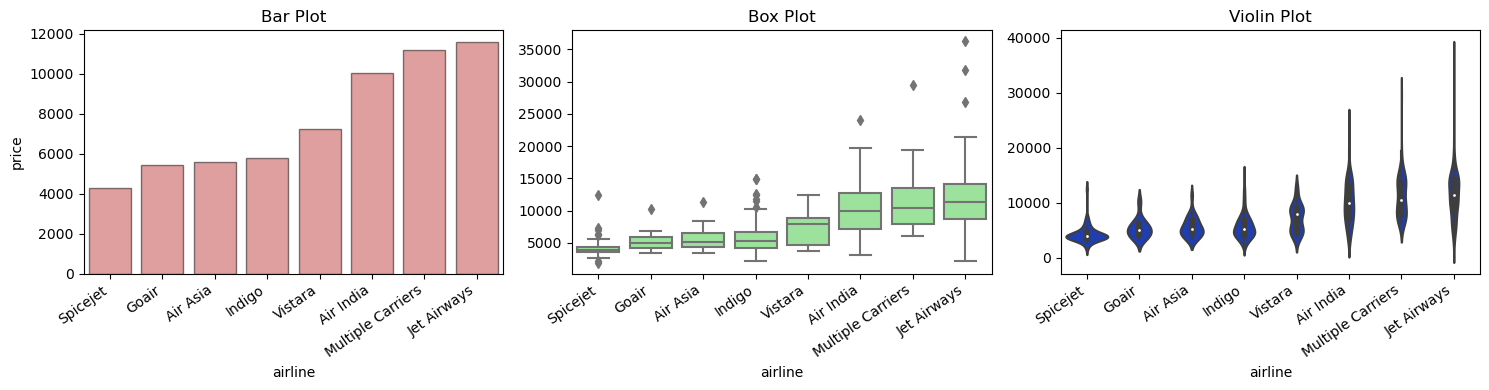

In [56]:
eda_helper_functions.num_cat_bivar_plots(
    data = train,
    num_var = 'price',
    cat_var = 'airline'
)

In [57]:
eda_helper_functions.num_cat_hyp_testing(train,'price','airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 56.62409304537801
- p-value              : 7.790152732510175e-63
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 299.0417524515842
- p-value              : 9.690812278057786e-61
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


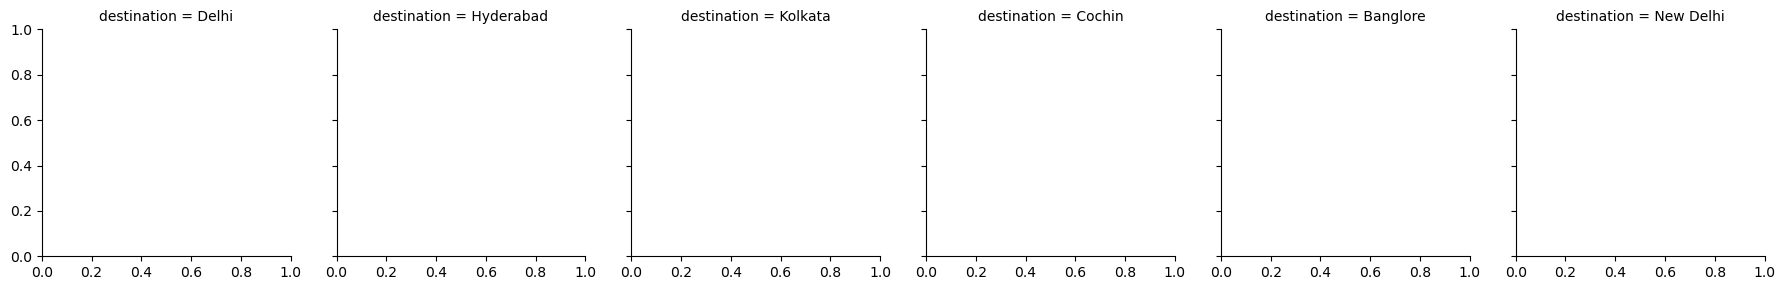

In [58]:
airline_grid=sns.FacetGrid(
    data = train,
    col = 'destination'
)

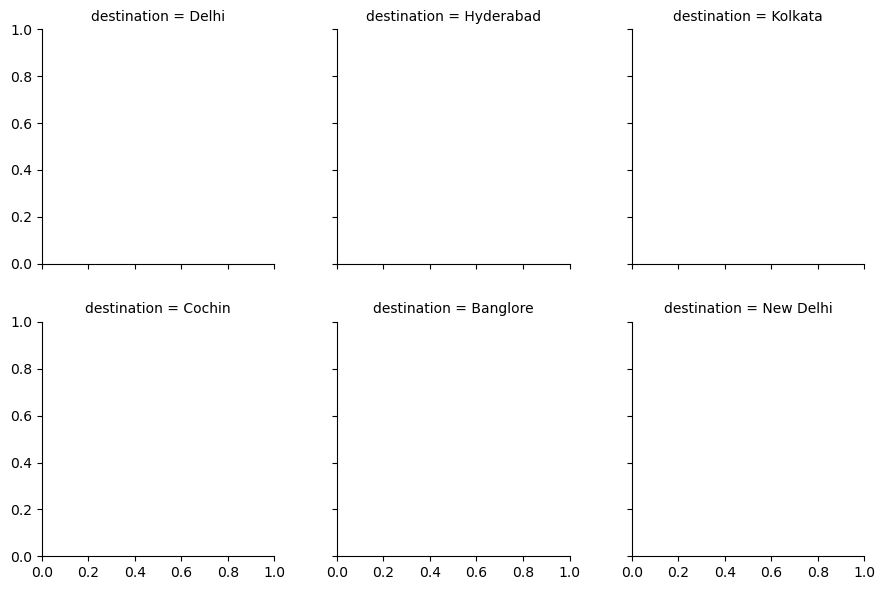

In [59]:
airline_grid=sns.FacetGrid(
    data = train,
    col = 'destination',
    col_wrap=3,
    sharey=True
)

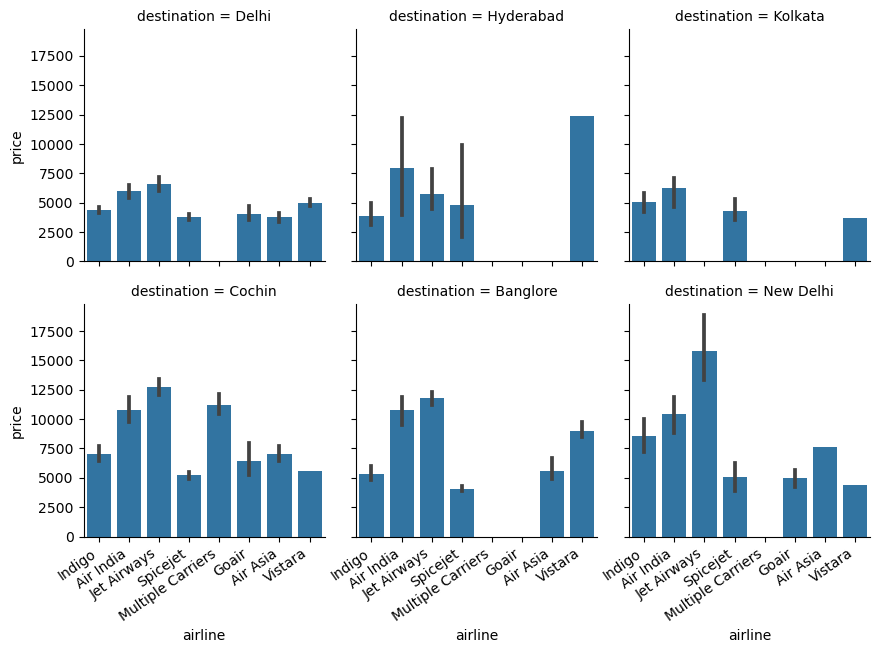

In [65]:
airline_grid=sns.FacetGrid(
    data = train,
    col = 'destination',
    col_wrap=3,
    sharey=True
)

airline_grid.map(sns.barplot,'airline','price',order=train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2 Date_od_journey

In [66]:
train.date_of_journey

0     2019-06-01
1     2019-05-21
2     2019-06-01
3     2019-05-27
4     2019-05-09
         ...    
635   2019-03-03
636   2019-04-09
637   2019-06-27
638   2019-06-24
639   2019-05-18
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

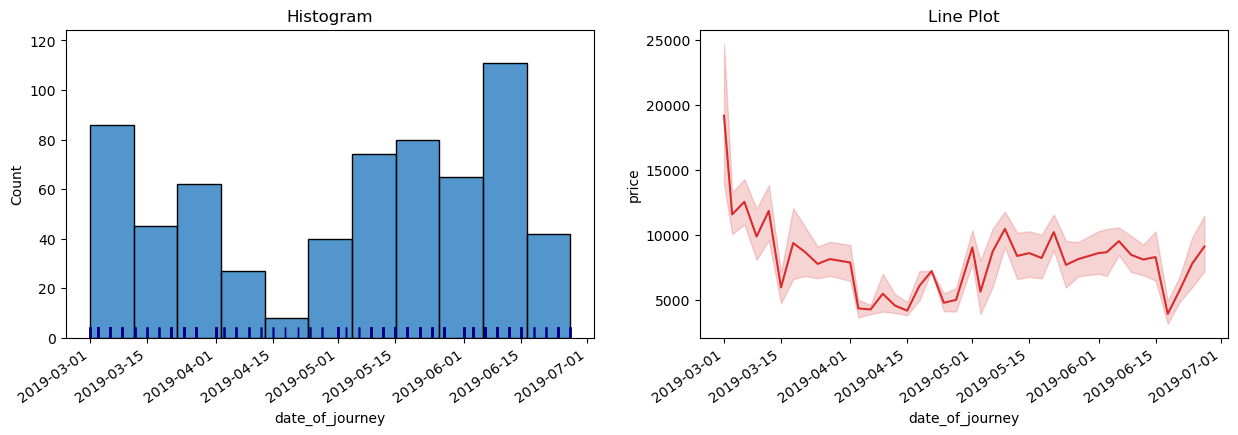

In [67]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var='date_of_journey',
    target='price'
)

In [73]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey',freq='M'))
    .price.mean()
)

date_of_journey
2019-03-31    10576.315789
2019-04-30     5892.409091
2019-05-31     8963.366667
2019-06-30     8431.569948
Freq: M, Name: price, dtype: float64

In [74]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey',freq='M'))
    .price.mean()
    .to_frame()      # converts into DataFrame
    .set_axis(['March','April','May','June'])
    .rename_axis(index='Month')
)

,price
Month,
March,10576.315789
April,5892.409091
May,8963.366667
June,8431.569948


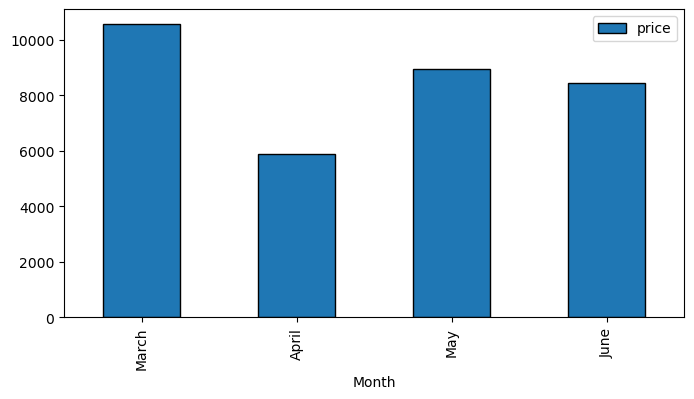

In [83]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey',freq='M'))
    .price.mean()
    .to_frame()      # converts into DataFrame
    .set_axis(['March','April','May','June'])
    .rename_axis(index='Month')
    .plot(
        kind='bar',
        figsize=(8,4),
        edgecolor='black'
    )
)
ax=plt.gca()

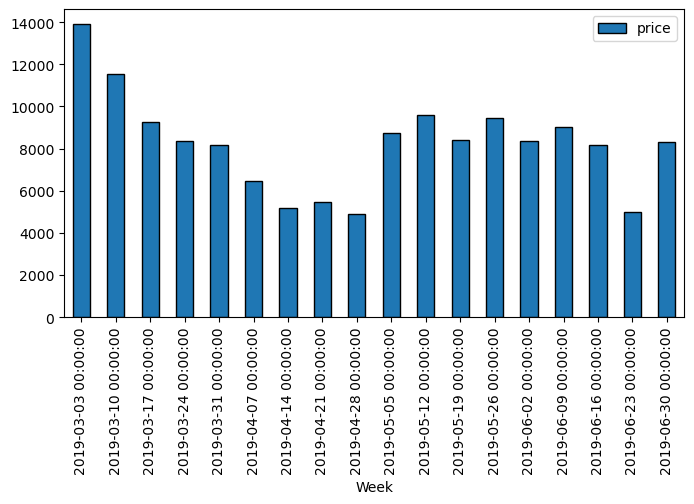

In [80]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey',freq='W'))
    .price.mean()
    .to_frame()      # converts into DataFrame
    # .set_axis(['March','April','May','June'])
    .rename_axis(index='Week')
    .plot(
        kind='bar',
        figsize=(8,4),
        edgecolor='black'
    )

    
)
ax=plt.gca()

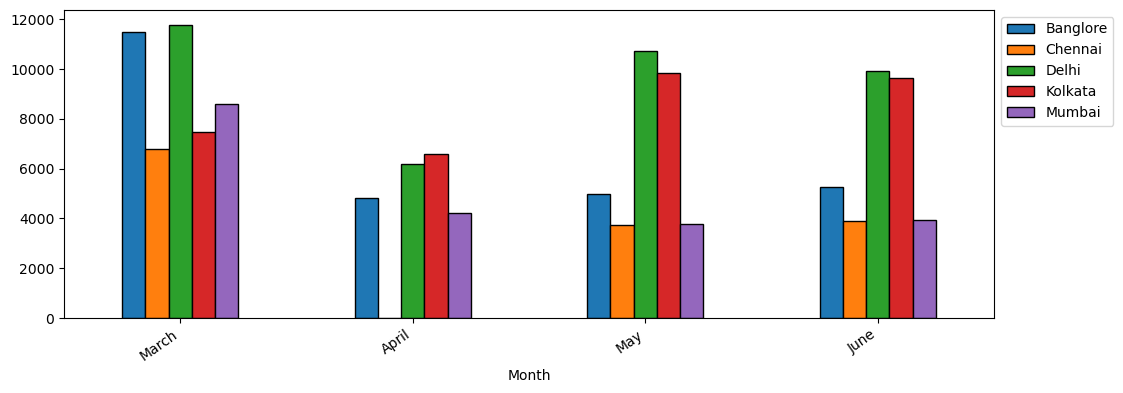

In [97]:
(
    train
    .groupby([pd.Grouper(key='date_of_journey',freq='M'),'source'])
    .price.mean()   
    .unstack(fill_value=0)
    .set_axis(['March','April','May','June'])
    .rename_axis(index='Month')
    .plot(
        kind='bar',
        figsize=(12,4),
        edgecolor='black'
    )
)

ax=plt.gca()
ax.legend(
    loc='upper left',
    bbox_to_anchor=(1,1)
)

eda_helper_functions.rotate_xlabels(ax)

### 8.3 Dep_time

In [99]:
train.dep_time # It will give time since it is updated today it will show today's date

0     2024-06-23 04:00:00
1     2024-06-23 15:00:00
2     2024-06-23 14:45:00
3     2024-06-23 07:05:00
4     2024-06-23 08:25:00
              ...        
635   2024-06-23 19:35:00
636   2024-06-23 17:10:00
637   2024-06-23 05:30:00
638   2024-06-23 16:45:00
639   2024-06-23 14:25:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

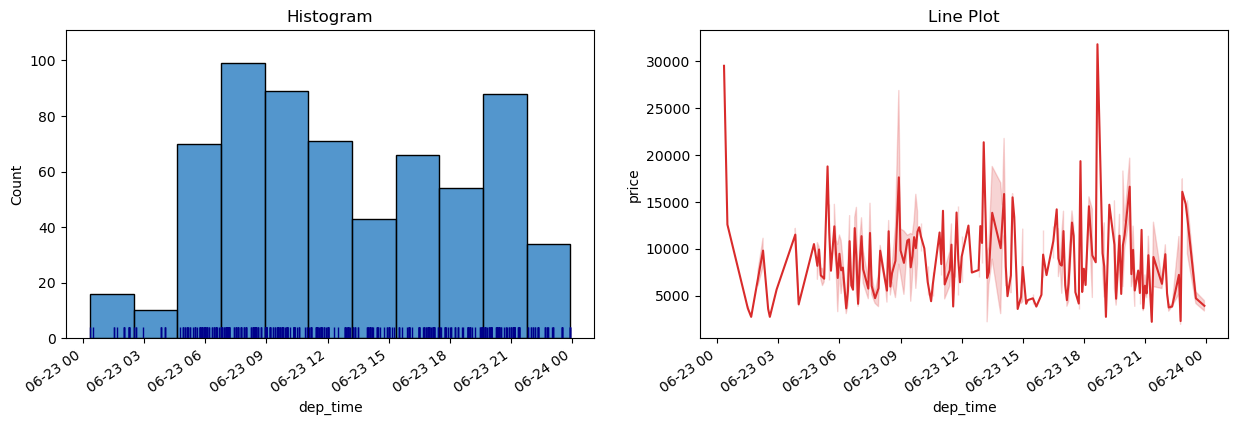

In [101]:
eda_helper_functions.dt_univar_plots(train,'dep_time','price')

# In this the time is showing in hr

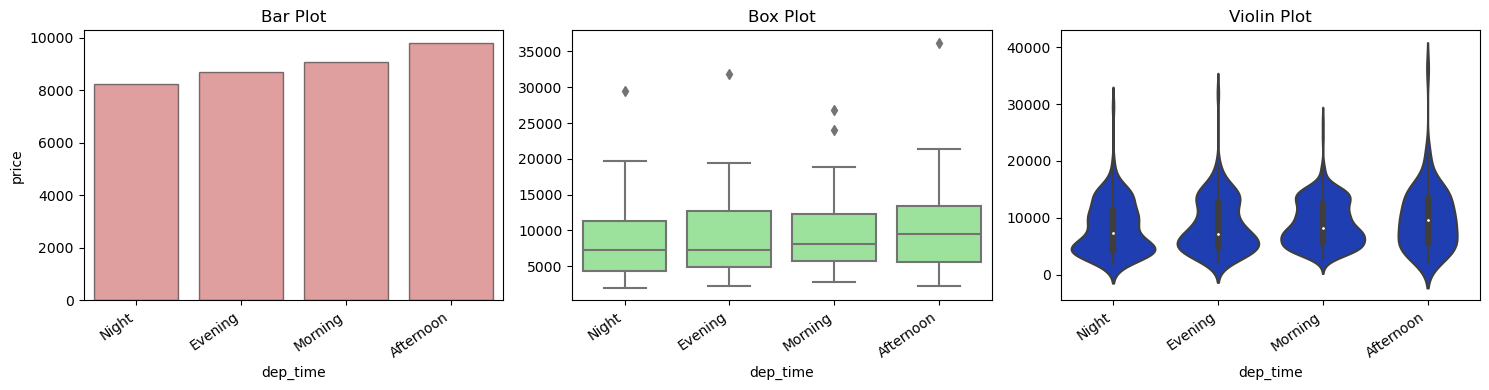

In [108]:
(
    train
    .assign(dep_time = lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive='left'),
                  df_.dep_time.dt.hour.between(12,16,inclusive='left'),
                  df_.dep_time.dt.hour.between(16,20,inclusive='left')],
                 ['Morning','Afternoon','Evening'],
                 default='Night')
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,'price','dep_time')

)

### 8.4 Duration

In [109]:
train.duration

0      170
1       85
2      140
3      330
4      475
      ... 
635     90
636    150
637    425
638    340
639    150
Name: duration, Length: 640, dtype: int64

In [110]:
eda_helper_functions.num_summary(train,'duration')

# trimmed mean(5%) means removinf the 1st 5 percent and last percent and taking the mean of reImportWarning

0      170
1       85
2      140
3      330
4      475
      ... 
635     90
636    150
637    425
638    340
639    150
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,80.00
5,90.00
10,140.00
25,170.00
50,447.50
75,831.25
90,1410.50
95,1610.25
99,1826.10


,value
mean,587.156250
trimmed mean (5%),549.583333
trimmed mean (10%),517.138672
median,447.500000


,value
var,234240.570227
std,483.984060
IQR,661.250000
mad,287.500000
coef_variance,0.824285


,value
skewness,1.048564
kurtosis,0.278796


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 8.880440081812151e-23
Test Statistic       : 0.8683735132217407
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 27.44488678972482
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


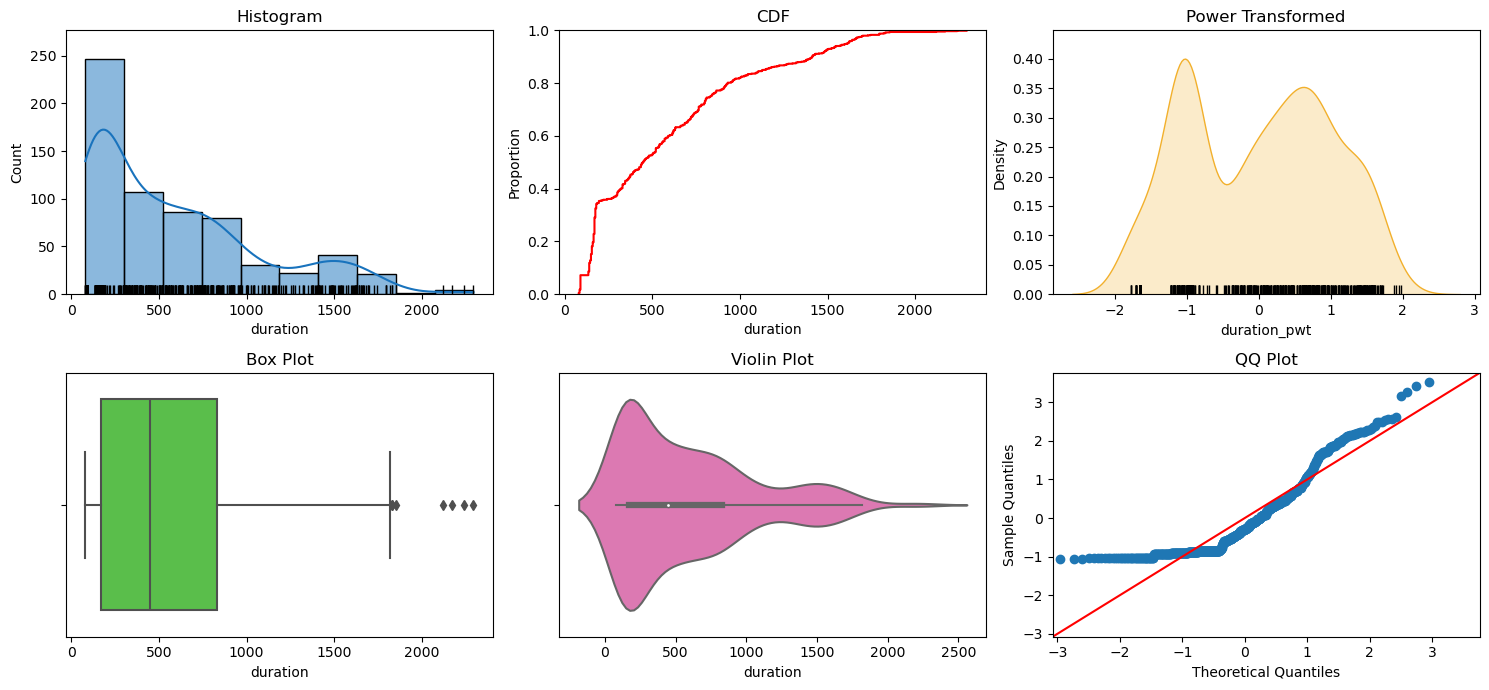

In [111]:
eda_helper_functions.num_univar_plots(train,'duration')
# Power transform make graph more symmetric

In [116]:
# Dont know why but this code is giving errors
# eda_helper_functions.num_bivar_plots(
# 	train,
# 	"duration",
# 	"price",
# 	hexbin_kwargs=dict(
# 		yscale="log",
# 		gridsize=20,
# 		cmap="Blues"
# 	)
# )

eda_helper_functions.num_num_hyp_testing(train, "price", "duration")


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5156360238855564
- p-value              : 9.220556689510648e-45
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6962175531296265
- p-value              : 6.280659180554757e-94
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


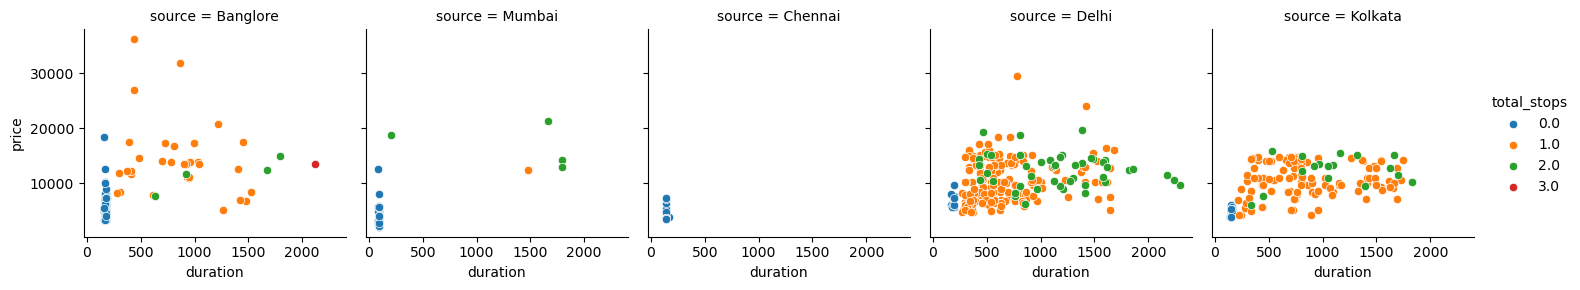

In [122]:
duration_grid=sns.FacetGrid(
    train,
    col='source',
    hue='total_stops',
    sharey=True
)
duration_grid.map(sns.scatterplot,'duration','price')
duration_grid.add_legend()

In [123]:
eda_helper_functions.get_iqr_outliers(train, "duration")


Lower Limit : -821.875
Upper Limit : 1823.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
155,Air India,2019-05-06,Kolkata,Banglore,2024-06-23 12:00:00,2024-06-23 18:30:00,1830,2.0,No Info,10151
251,Air India,2019-05-01,Kolkata,Banglore,2024-06-23 12:00:00,2024-06-23 18:30:00,1830,2.0,No Info,10151
178,Air India,2019-06-12,Delhi,Cochin,2024-06-23 12:20:00,2024-06-23 19:15:00,1855,2.0,No Info,12488
579,Air India,2019-03-12,Banglore,New Delhi,2024-06-23 06:45:00,2024-06-23 18:05:00,2120,3.0,No Info,13387
617,Air India,2019-03-03,Delhi,Cochin,2024-06-23 07:05:00,2024-06-23 19:15:00,2170,2.0,No Info,11552
271,Air India,2019-05-21,Delhi,Cochin,2024-06-23 05:55:00,2024-06-23 19:15:00,2240,2.0,No Info,10493
179,Air India,2019-06-06,Delhi,Cochin,2024-06-23 05:00:00,2024-06-23 19:15:00,2295,2.0,No Info,9653


### 8.5 additional_info

In [124]:
eda_helper_functions.cat_summary(train, "additional_info")


0                          No Info
1                          No Info
2                          No Info
3      In-flight meal not included
4                          No Info
                  ...             
635                        No Info
636                        No Info
637    In-flight meal not included
638                        No Info
639                        No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 4 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,4
top,No Info
freq,516


,count,percentage
category,,
No Info,516,0.806250
In-flight meal not included,100,0.156250
No check-in baggage included,22,0.034375
1 Long layover,2,0.003125


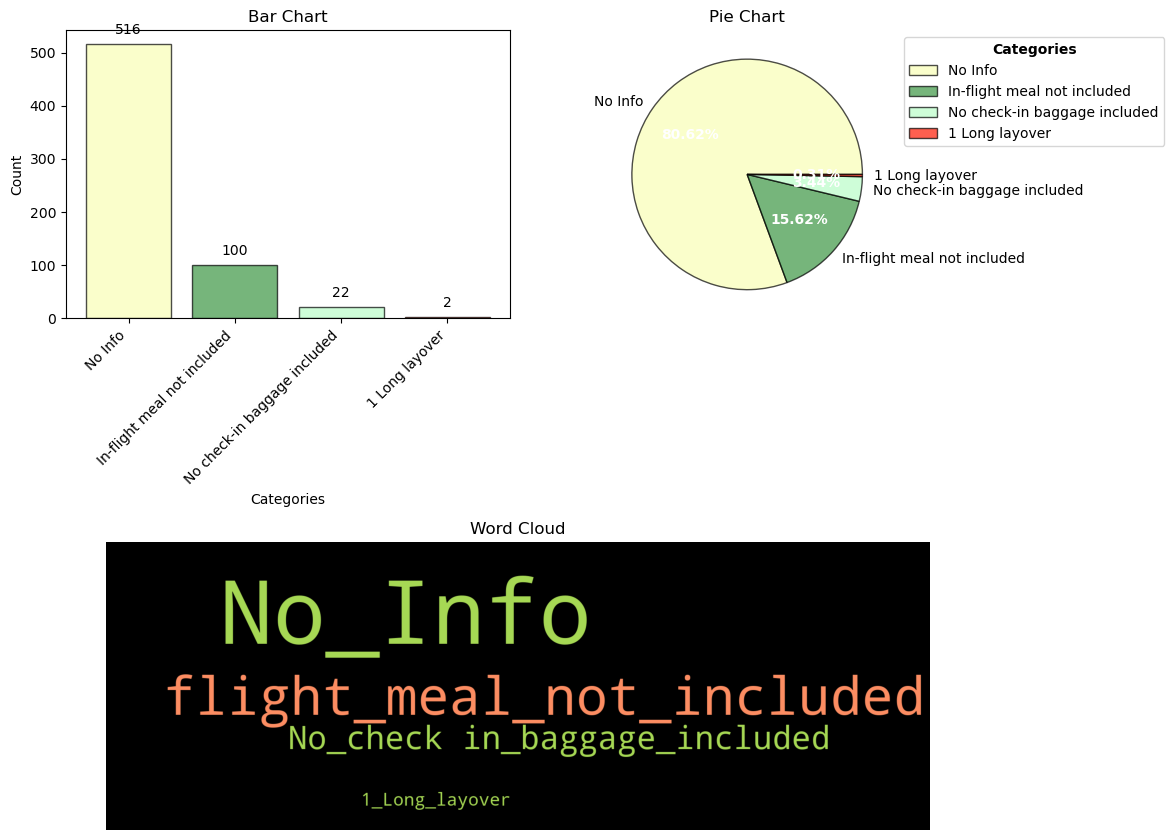

In [125]:
eda_helper_functions.cat_univar_plots(train, "additional_info")


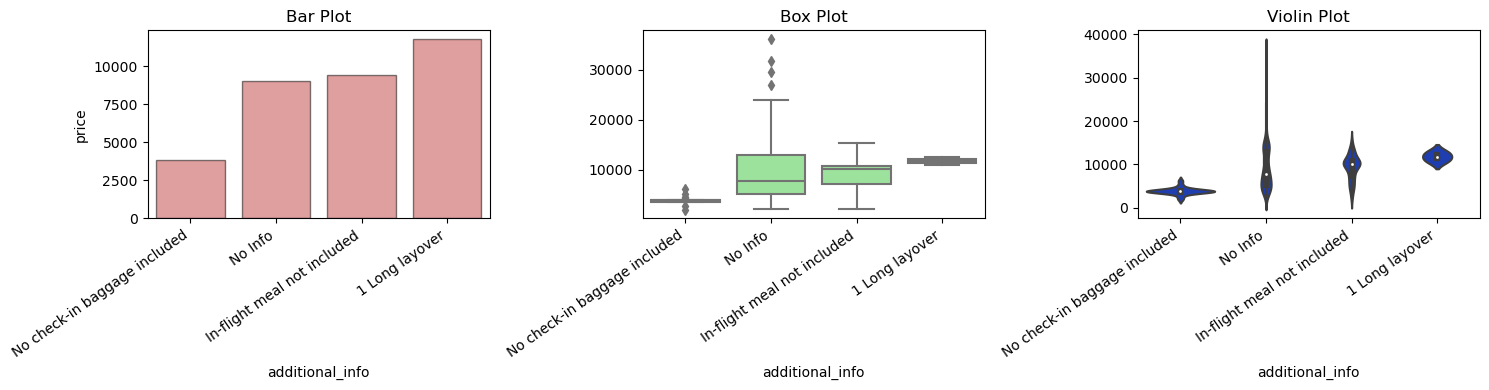

In [126]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")


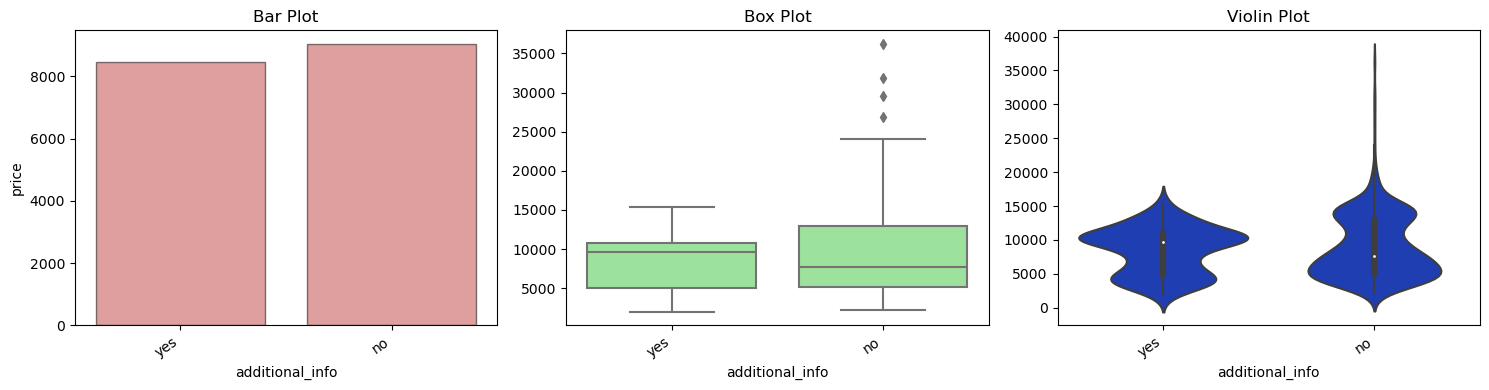

In [127]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)